In [ ]:
# BAI 457: Final Project
# Exploratory Data Analysis 

In [1]:
##### LOAD PACKAGES #####

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##### LOAD DATASET #####

traffic = pd.read_csv("traffic.csv", parse_dates=['Published Date', 'Time_Hour'])

In [3]:
##### DATASET OVERVIEW #####

# determine basic structure
traffic.info()

# quick statistics
traffic.describe()

# determine missing value counts
traffic.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418450 entries, 0 to 418449
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Traffic Report ID  418450 non-null  object             
 1   Published Date     418450 non-null  datetime64[ns, UTC]
 2   Issue Reported     418450 non-null  object             
 3   Location           418200 non-null  object             
 4   Latitude           418371 non-null  float64            
 5   Longitude          418371 non-null  float64            
 6   Address            418450 non-null  object             
 7   Status             416757 non-null  object             
 8   Status Date        418450 non-null  object             
 9   Agency             61866 non-null   object             
 10  Time_Hour          418450 non-null  datetime64[ns]     
 11  Volume             149074 non-null  float64            
 12  Speed              149074 non-

Traffic Report ID         0
Published Date            0
Issue Reported            0
Location                250
Latitude                 79
Longitude                79
Address                   0
Status                 1693
Status Date               0
Agency               356584
Time_Hour                 0
Volume               269376
Speed                269376
dtype: int64

In [4]:
##### TIME BASED PATTERNS #####

# incident counts by hour of day
traffic['Hour'] = traffic['Time_Hour'].dt.hour
hourly_counts = traffic['Hour'].value_counts().sort_index()
print(hourly_counts)

# incident counts by weekday
traffic['Weekday'] = traffic['Time_Hour'].dt.day_name()
weekday_counts = traffic['Weekday'].value_counts()
print(weekday_counts)

0     22431
1     18340
2     15467
3     12055
4      9410
5      7538
6      6755
7      7775
8      7005
9      5650
10     6605
11    11418
12    18379
13    22417
14    21817
15    20932
16    22327
17    24886
18    25394
19    24813
20    25263
21    27632
22    28724
23    25417
Name: Hour, dtype: int64
Friday       66140
Thursday     62789
Wednesday    62042
Tuesday      60762
Monday       59870
Saturday     57695
Sunday       49152
Name: Weekday, dtype: int64


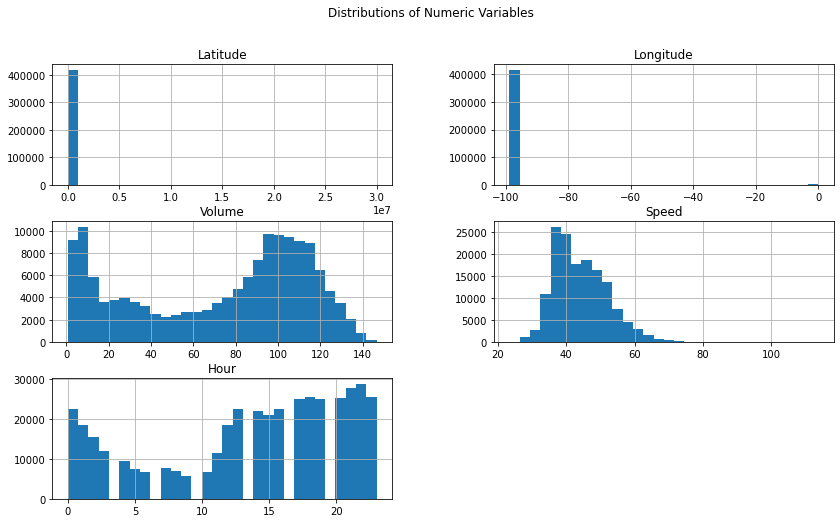

In [5]:
##### VARIABLE DISTRIBUTIONS #####

numeric_cols = traffic.select_dtypes(include=['float64', 'int64']).columns

traffic[numeric_cols].hist(bins=30, figsize=(14, 8))
plt.suptitle("Distributions of Numeric Variables")
plt.show()

In [6]:
##### OUTLIER DETECTION #####

print("\n Top 5 Highest Volume Readings:\n")
print(traffic.sort_values(by='Volume', ascending=False).head(5))

print("\n Bottom 5 Lowest Speeds:\n")
print(traffic.sort_values(by='Speed').head(5))


 Top 5 Highest Volume Readings:

                                        Traffic Report ID  \
28830   1044690FB7396009F731D125BD18E634FD77AD28_15538...   
374215  5748E8895723A0DA63D2BC75B935735A9C0D9699_15538...   
365240  537337C8D4656D862C12E79427C9232B5B7D803E_15538...   
33117   E6CFA8E4A054B888D7A80898D1A7092AA631A302_15538...   
372439  9B81AB8B62E90FA70A75B819D6F773CC281D6F75_15538...   

                  Published Date     Issue Reported  \
28830  2019-03-29 22:35:53+00:00   zSTALLED VEHICLE   
374215 2019-03-29 22:40:56+00:00      Crash Service   
365240 2019-03-29 22:30:13+00:00       Crash Urgent   
33117  2019-03-29 22:36:24+00:00     Traffic Hazard   
372439 2019-03-29 22:23:00+00:00  COLLISN/ LVNG SCN   

                            Location   Latitude  Longitude  \
28830   POINT (-97.745753 30.397642)  30.397642 -97.745753   
374215    POINT (-97.741819 30.2668)  30.266800 -97.741819   
365240  POINT (-97.733606 30.292674)  30.292674 -97.733606   
33117   POINT (-97.6